<a href="https://colab.research.google.com/github/decci027/css-selector/blob/main/ProjectUnit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context: Placebos are substances or treatments that have no active therapeutic effect but can still trigger a response in a patient. This phenomenon is known as the "placebo effect," where the patient's belief in the treatment causes a real, measurable improvement in their condition, even though the treatment itself is inert. There are many clinical trials where a person who has taken the placebo instead of the active treatment has reported an improvement in symptoms. Belief in a treatment may be enough to change the course of a person's physical illness. The question of how placebos can induce physical reactions?




In [30]:
!pip install preliz

In [31]:
import preliz as pz

In [32]:
import numpy as np
import arviz as az
import pymc as pm

<Axes: >

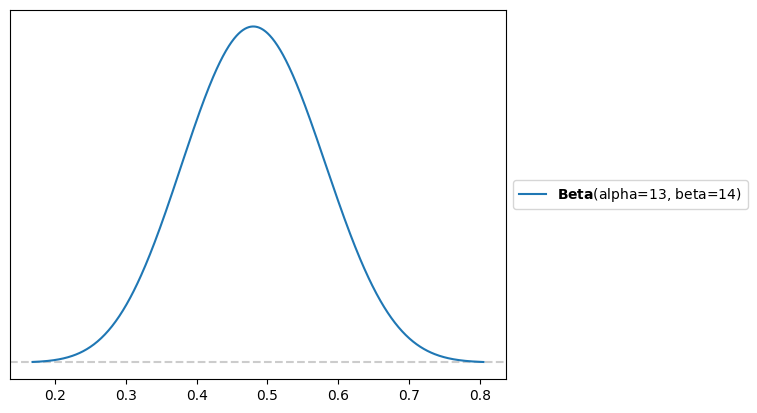

In [38]:
#plotting the beta distribution with shape parameter 24 and scale parameter 12
pz.Beta(alpha=13,beta=14).plot_pdf()


###Prior:
Before there was extensive research done on placebos, medical professionals assumed that physiological changes in the body could only be caused by active treatments. The prevailing belief was that without pharmacologically active ingredients, there would be no measurable effects. The mind-body connection was often underappreciated, and the focus was largely on how drugs and physical therapies could induce healing or relief from symptoms. The reason why I chose this is mainly because I have a bit of expertise (due to statistics) & R, and interested about why most studies in statistics use examples of placebos and drugs/medicine in random sampling. For my prior, I predicted that the model only shows .45% that placebo proves true to have effects. Everything else results in a percentage revealing it is false

In [41]:
#store the prior distribution for the Free Throw (FT) percentage
placebo_prior = pz.Beta(alpha=13,beta=14)

#preliz does not have a function that returns the mode, so I will use a formula
placebo_prior_mode = (placebo_prior.alpha - 1)/(placebo_prior.alpha + FT_prior.beta - 2)

#the mean mean first, then median, and finally mode
placebo_prior.mean(), placebo_prior.median(), placebo_prior_mode

(0.48148148148148145, 0.4810175446358615, 0.48)

In [35]:
data=np.array([0,1,0,1,1,0,1,0,1,1,1,0,1,0,1,1,1])

In [36]:
with pm.Model() as PC_2024_model:
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 11. , beta = 14.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = data)

  #sample from the posterior, 2000 for a more prcise picture later
  placebo_2024 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

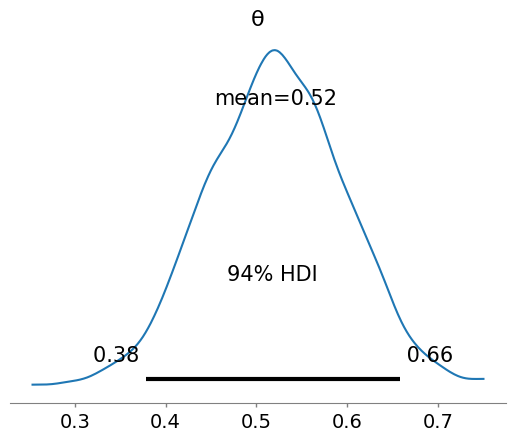

In [37]:
#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(placebo_2024)


Posterior | PYMC : This posterior understanding underscores the powerful connection between belief and biology, showing that the mere perception of treatment can cause the body to react as if it were receiving an actual intervention. My prediction served to be almost true. Due to the calculations, I got around .04%. I found this relatively not that shocking since placebos tend to work due to not only the altercation of our behavior, but also because we tend to place expectations or conditioned responses for ourselves. (For instance, we take a medicine (placebo) and expect to feel better. OR. We know that med is going to be effective -- therefore not much thought is gone into deciding if it's fake or not.) In addition, if we compare this to my *prior*, then we can see that the number of placebos tend to be effective. This helps suggest that the research proves true and reinstate the question of inducing physical reactions.